In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

inflation=pd.read_csv("inflation.csv")
unemployment=pd.read_csv("unemployment.csv")   #needs aggregation

In [2]:
inflation.columns = ['year', 'inflation']
unemployment.columns = ['year', 'unemployment']

In [3]:
unemployment['year']=unemployment['year'].str[:4]     #I removed the days and months because they are irrelevant and look ugly

In [4]:
unemployment.head(1)

,year,unemployment
0,1960,5.2


In [5]:
inflation['year']=inflation['year'].str[:4]
inflation.head(1)

,year,inflation
0,1960,1.457976


In [6]:
print(unemployment.shape)   #rows, columns

(769, 2)


In [7]:
print(len(unemployment))

769


In [8]:
print(769/12)      #there are 64 years of unemployment data

64.08333333333333


In [9]:
print(64*12)

768


In [10]:
inflation.shape

(63, 2)

In [11]:
unemployment_yearly = pd.DataFrame(columns=['year', 'unemployment'])

In [12]:
""" 
for i in range(len(unemployment)):
    print(unemployment.iloc[i,1])    #rows, columns
"""

' \nfor i in range(len(unemployment)):\n    print(unemployment.iloc[i,1])    #rows, columns\n'

In [14]:
unemployment_yearly.iloc[:,0]=inflation.iloc[:,0]   #inflation has values until 2022
unemployment_yearly.tail(3)

,year,unemployment
60,2020,NaN
61,2021,NaN
62,2022,NaN


In [15]:
unemployment.tail(3)

,year,unemployment
766,2023,3.7
767,2023,3.7
768,2024,3.7


In [16]:
a = pd.DataFrame({              #adding two more rows to the dataframe
    'year': ["2023","2024"],
    'unemployment': [99,3.7]
})
unemployment_yearly = pd.concat([unemployment_yearly, a], ignore_index=True)
#unemployment_yearly=unemployment_yearly.append({year: 2023, unemployment: 99}, ignore_index=True)
#unemployment_yearly=unemployment_yearly.append({year: 2024, unemployment: 99}, ignore_index=True)

C:\Users\THW\AppData\Local\Temp\ipykernel_4456\902170140.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  unemployment_yearly = pd.concat([unemployment_yearly, a], ignore_index=True)


In [19]:
unemployment_yearly.tail(3)

,year,unemployment
62,2022,NaN
63,2023,99.0
64,2024,3.7


In [20]:
inflation.tail(3)

,year,inflation
60,2020,1.233584
61,2021,4.697859
62,2022,8.002800


In [21]:
#for i in range(64):
#    print(i,"   ",unemployment.iloc[i*12:(i+1)*12,1].mean())          #verifying that the indexing formula is correct

In [29]:
for i in range(64):
    unemployment_yearly.iloc[i,1]=unemployment.iloc[i*12:(i+1)*12,1].mean()
unemployment_yearly.tail(5)                                            #finally aggregating

,year,unemployment
60,2020,8.091667
61,2021,5.350000
62,2022,3.633333
63,2023,3.625000
64,2024,3.700000


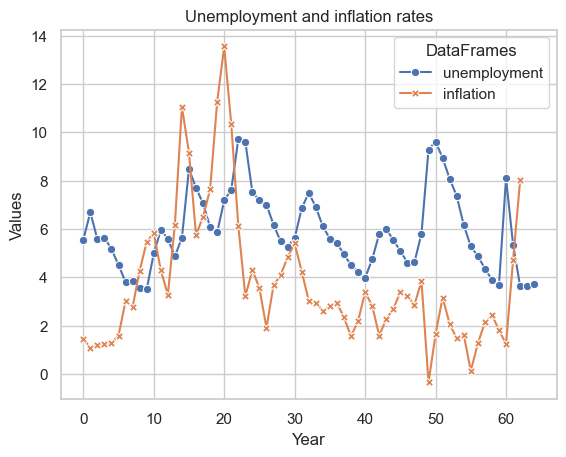

In [30]:
#Plot withut years

df1 = unemployment_yearly
df2 = inflation

# Merge the two DataFrames
merged_df = pd.concat([df1['unemployment'], df2['inflation']], axis=1)
merged_df.columns = ['unemployment', 'inflation']

# Plotting with Seaborn
sns.set(style="whitegrid")
sns.lineplot(data=merged_df, markers=True, dashes=False)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Unemployment and inflation rates')
plt.legend(title='DataFrames')
plt.show()

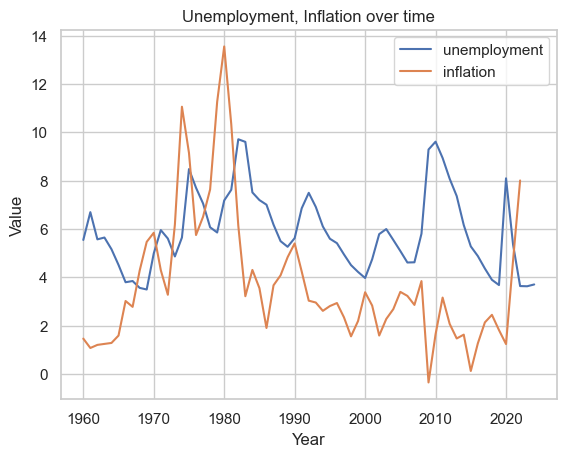

In [32]:
#Plot with years

unemployment_yearly["year"]=unemployment_yearly["year"].astype(int)
inflation["year"]=inflation["year"].astype(int)

df11 = unemployment_yearly
df22 = inflation

# Extracting the year and variables from each DataFrame
year1, variable1 = df11['year'], df11['unemployment']
year2, variable2 = df22['year'], df22['inflation']

# Plotting using Matplotlib
plt.plot(year1, variable1, label='unemployment')
plt.plot(year2, variable2, label='inflation')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Unemployment, Inflation over time')
plt.legend()

plt.show()